In [45]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from os.path import join
import pandas as pd
from glob import glob

In [46]:
def list_images():
    cwd = os.getcwd()
    
    files = []
    for ext in ('*.jpg', '*.png'):
        #files.extend(glob(join(cwd, ext)))
        files.extend(glob(ext))
    
    return files

In [47]:
if __name__ == "__main__":
    #leitura da imagem de entrada
    original_image = cv2.imread(sys.argv[1])


    #definição da imagem de saída
    output_file = sys.argv[2]
    

    cv2.imwrite(output_file, output_image)

NameError: name 'output_image' is not defined

In [ ]:
imagens_list = list_images()
print(imagens_list)

In [ ]:
original_image = cv2.imread('70-1.jpg')
original_image_bw = cv2.cvtColor(original_image , cv2.COLOR_BGR2GRAY)

img_threshold = cv2.adaptiveThreshold(original_image_bw, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
ret, img_threshold2 = cv2.threshold(original_image_bw, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# cv2.imshow('teste', img_threshold)
# cv2.waitKey(0)

In [ ]:
plt.imshow(img_threshold2)
plt.show()

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10,10))
opening = cv2.morphologyEx(img_threshold2, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)
plt.show()

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
erosion = cv2.erode(img_threshold2,kernel,iterations = 10)
plt.imshow(erosion)
plt.show()

In [ ]:
plt.imshow(erosion)
plt.show()

In [ ]:
cv2.imshow('teste', original_image_bw)
cv2.waitKey(0)

In [ ]:
image = cv2.imread('70-1.jpg',cv2.IMREAD_UNCHANGED)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret,binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)

binary = cv2.bitwise_not(binary)

H = cv2.Sobel(binary, cv2.CV_8U, 0, 2)
V = cv2.Sobel(binary, cv2.CV_8U, 2, 0)

rows,cols = image.shape[:2]

### OUTROS TESTES

In [ ]:
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage
import numpy as np
import argparse
import imutils
import cv2

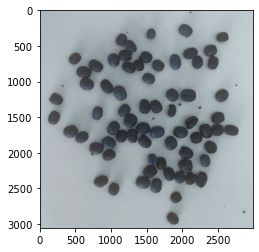

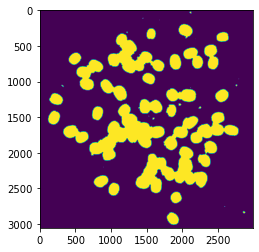

In [61]:
# load the image and perform pyramid mean shift filtering
# to aid the thresholding step
image = cv2.imread('70-1.jpg',cv2.IMREAD_UNCHANGED)
shifted = cv2.pyrMeanShiftFiltering(image, 21, 51)
plt.imshow(image)
plt.show()


# convert the mean shift image to grayscale, then apply
# Otsu's thresholding
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=5)


thresh = cv2.bitwise_not(thresh)


plt.imshow(thresh)
plt.show()

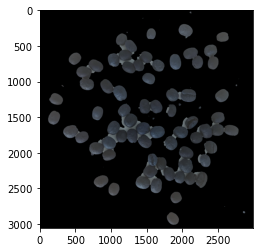

In [56]:
result_g = cv2.bitwise_and(image, image, mask=thresh)
plt.imshow(result_g)
plt.show()

In [62]:
# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20, labels=thresh)

# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

<ipython-input-62-9589de1fb453>:5: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  localMax = peak_local_max(D, indices=False, min_distance=20, labels=thresh)


[INFO] 91 unique segments found


In [69]:
# loop over the unique labels returned by the Watershed
# algorithm
for label in np.unique(labels):
	# if the label is zero, we are examining the 'background'
	# so simply ignore it
	if label == 0:
		continue

	# otherwise, allocate memory for the label region and draw
	# it on the mask
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[labels == label] = 255

	# detect contours in the mask and grab the largest one
	cnts = cv2.findContours(mask.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
	area = cv2.contourArea(cnts)
	print(area)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)

	

	cv2.drawContours(image , cnts , -1 , (0 ,255 , 0) , 2)

	# draw a circle enclosing the object
	# ((x, y), r) = cv2.minEnclosingCircle(c)
	# cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
	# cv2.putText(image, "#{}".format(label), (int(x) - 10, int(y)),
	# 	cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

# show the output image
plt.imshow(image)
plt.show()
# cv2.imshow("Output", image)
# cv2.waitKey(0)

error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'contourArea'
> Overload resolution failed:
>  - contour is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'contour'


In [60]:
cv2.imwrite('output4.png', image)

True

In [66]:
for label in np.unique(labels):
    mask = np.zeros(gray.shape, dtype="uint8")
	mask[labels == label] = 255
    cnts = cv2.findContours(mask.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # cnts = imutils.grab_contours(cnts)
    area = cv2.contourArea(cnts)
    print(area)

error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'contourArea'
> Overload resolution failed:
>  - contour is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'contour'
